In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from Utils.constants import DATASETS_FOLDER_PATH


In [2]:
# import the data

In [4]:
from Utils.data_utils import load_data_from_folder
df = load_data_from_folder()
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,file_name
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,dataset_1.csv
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,dataset_1.csv
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,dataset_1.csv
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,dataset_1.csv
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,dataset_1.csv
...,...,...,...,...,...,...,...,...,...,...,...
6547,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,dataset_2.csv
6548,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1,dataset_2.csv
6549,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1,dataset_2.csv
6550,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1,dataset_2.csv


In [41]:
null_column = df.isnull().sum()
null_column.name = "null_sum"
null_column

ph                  982
Hardness              0
Solids                0
Chloramines           0
Sulfate            1562
Conductivity          0
Organic_carbon        0
Trihalomethanes     324
Turbidity             0
Potability            0
file_name             0
Name: null_sum, dtype: int64

In [37]:
null_column = df.isnull().sum()
null_column.name = "null_sum"
df_without_null = df.drop(columns=['file_name'])
df_without_null.fillna(df_without_null.mean(), inplace=True)

In [38]:
df_without_null

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
6547,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
6548,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
6549,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
6550,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [22]:
vY = df_without_null['Potability']
mX = df_without_null.drop(columns=['Potability'])

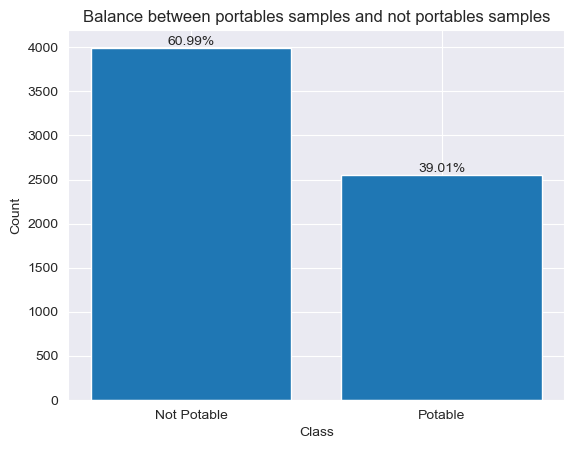

In [30]:
# checking if the data is balanced
classes_counts = vY.value_counts()
plt.bar(classes_counts.index, classes_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balance between portables samples and not portables samples')
plt.xticks(classes_counts.index, ['Not Potable', 'Potable'])
total = sum(classes_counts)
for index, value in classes_counts.items():
    percentage = (value / total) * 100
    plt.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [32]:
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(mX.copy(), vY.copy())

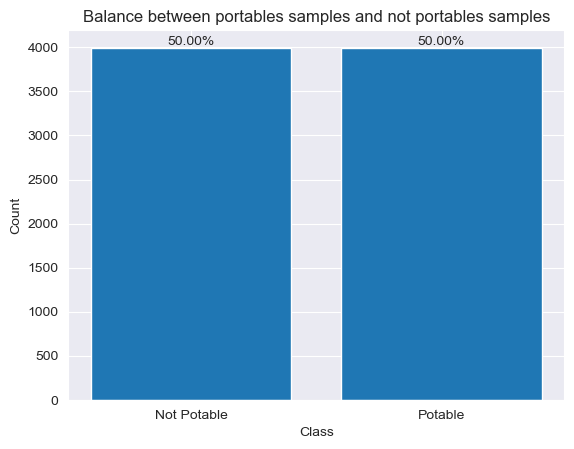

In [33]:
classes_counts = y_balanced.value_counts()
plt.bar(classes_counts.index, classes_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balance between portables samples and not portables samples')
plt.xticks(classes_counts.index, ['Not Potable', 'Potable'])
total = sum(classes_counts)
for index, value in classes_counts.items():
    percentage = (value / total) * 100
    plt.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

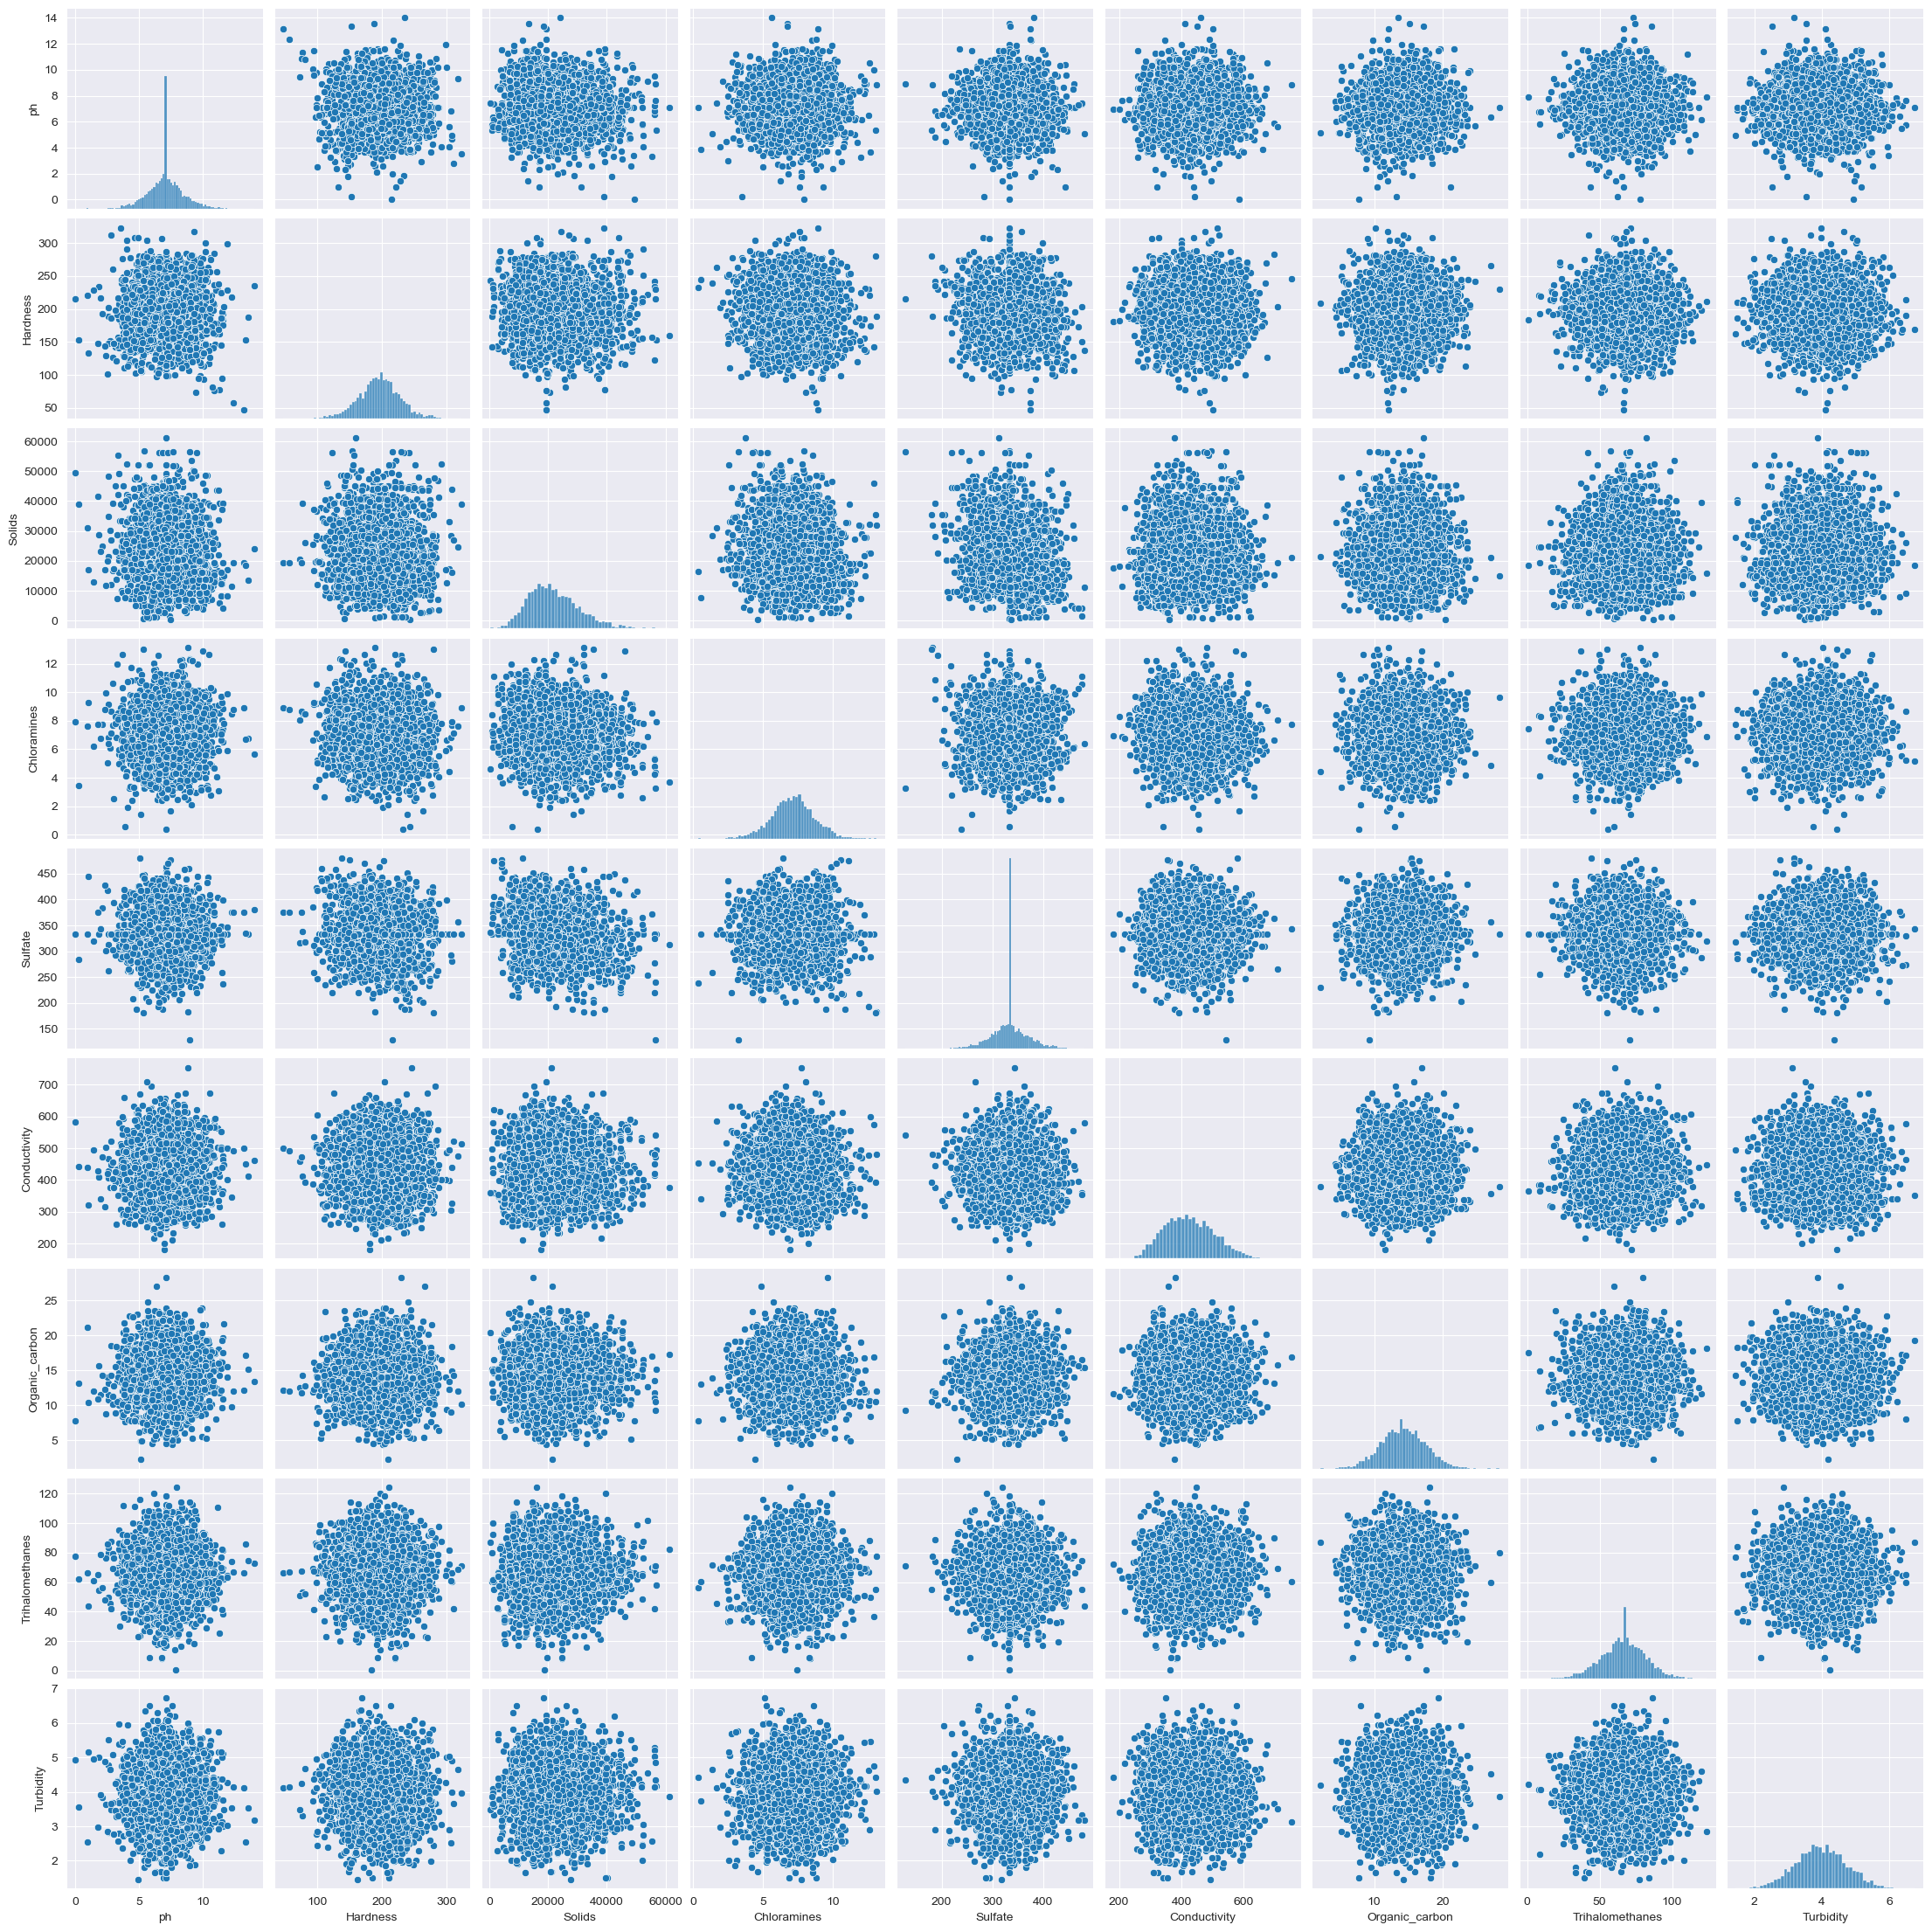

In [35]:
sns.pairplot(x_balanced)

In [36]:
correlation_matrix = x_balanced.corr()

print(correlation_matrix)

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.055217 -0.054424    -0.007035 -0.016680   
Hardness         0.055217  1.000000 -0.055435    -0.034218 -0.076560   
Solids          -0.054424 -0.055435  1.000000    -0.087550 -0.192362   
Chloramines     -0.007035 -0.034218 -0.087550     1.000000  0.030976   
Sulfate         -0.016680 -0.076560 -0.192362     0.030976  1.000000   
Conductivity     0.022961 -0.020712  0.026881    -0.019273 -0.024376   
Organic_carbon   0.038801  0.008871  0.017582    -0.018905  0.020400   
Trihalomethanes  0.005324 -0.012966 -0.007281     0.015749 -0.032896   
Turbidity       -0.030691 -0.010149  0.025153    -0.003000 -0.019389   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.022961        0.038801         0.005324  -0.030691  
Hardness            -0.020712        0.008871        -0.012966  -0.010149  
Solids               0.026881        0.017582      